# Auswertung 200218_6

### imports

In [1]:
import sys
sys.path.append("../toolbox/")
from workflow  import *

In [2]:
%load_ext autoreload

In [3]:
%autoreload

## define master data

In [4]:
measurement_id = "200218_6"
campaign_id    = "01_Messkampagne_1"
path_to_raw_data_folder = "C:\\Users\\joerg_j\\switchdrive\\PSI\\22_e-Instrumentation\\HERO\\IPA\\Rohdaten"
path_to_hdf5_folder = "HDF5"

In [5]:
rawfolder, hdf5file = paths(measurement_id, campaign_id, path_to_raw_data_folder, path_to_hdf5_folder)

### import data

In [6]:
traceName = "Trace"
pulseMin = None
pulseMax = None


C1 = readChannel("C1", rawfolder, traceName, pulseMin, pulseMax)
C3 = readChannel("C3", rawfolder, traceName, pulseMin, pulseMax)

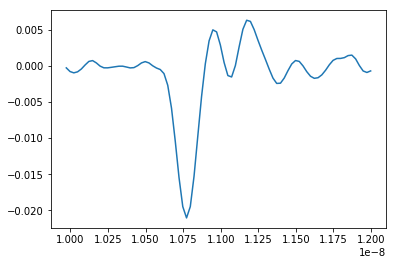

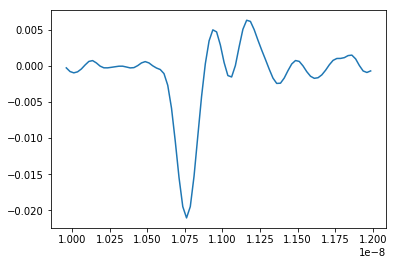

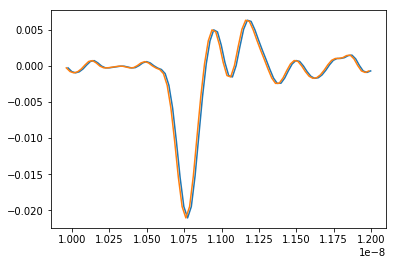

In [7]:
pulsnr = 123
viewImport(C1, C3, pulsnr)

### define area of interest

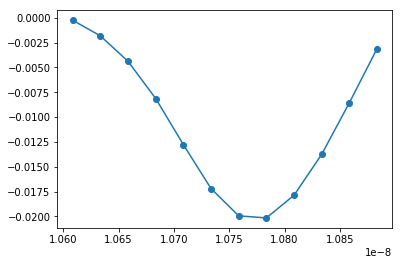

In [10]:
areaMinC1 = 25
areaMaxC1 = 37
pulsnr = 125

viewSelection(C1, pulsnr, areaMinC1, areaMaxC1)

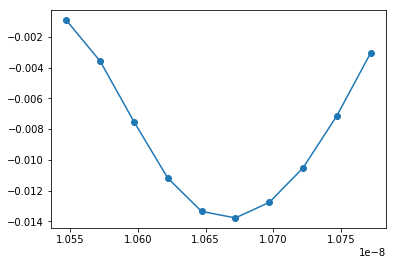

In [17]:
areaMinC3 = 23
areaMaxC3 = 33
pulsnr = 125

viewSelection(C3, pulsnr, areaMinC3, areaMaxC3)

## algorithm 1: fit gaussian function

In [18]:
# [A, mu, sigma]
gaussParamsC1 = [-1.5e-11, 1.078e-8, 5e-11]
gaussParamsC3 = [-1.0e-11, 1.07e-8, 5e-11]

In [19]:
C1["fit"] = fitChannel(C1["data"], areaMinC1, areaMaxC1, gaussParamsC1)

In [20]:
C3["fit"] = fitChannel(C3["data"], areaMinC3, areaMaxC3, gaussParamsC3)

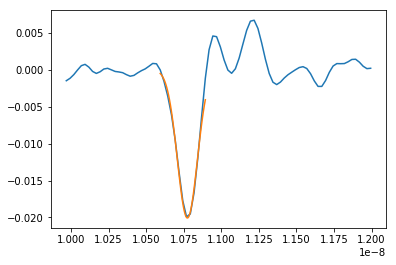

parameter: [-3.35789877e-12  1.07746745e-08  6.67165405e-11] [A, mu, sigma]


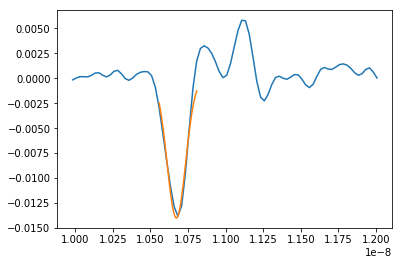

parameter: [-2.16555866e-12  1.06721898e-08  6.17086085e-11] [A, mu, sigma]


In [21]:
pulsnr = 125

viewFit(C1, pulsnr, areaMinC1, areaMaxC1, gaussParamsC1)
viewFit(C3, pulsnr, areaMinC3, areaMaxC3, gaussParamsC3)

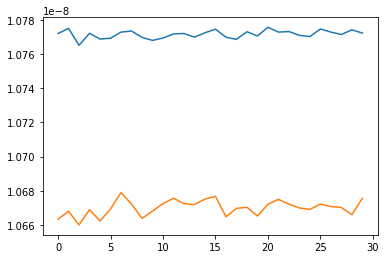

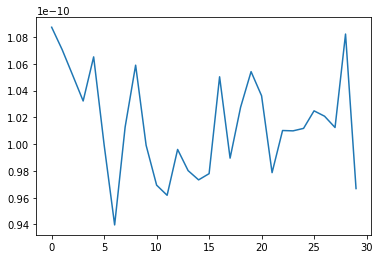

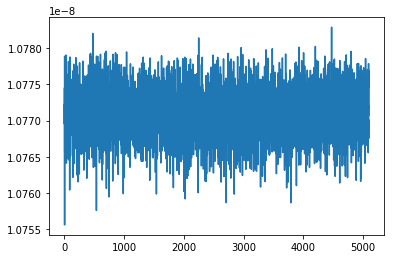

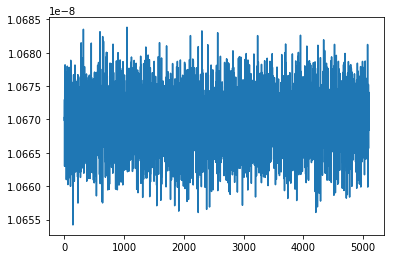

In [22]:
pulseMin = 100
pulseMax = 130

viewMu(C1, C3, pulseMin, pulseMax)

### histogram

In [23]:
JitterGauss = jitter(C1, C3, axis = 1)

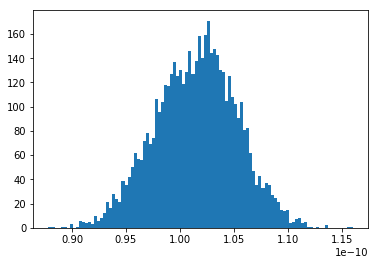

In [24]:
bins = 100

HistGauss = histogram(JitterGauss, bins)

### fit gauss to histogram

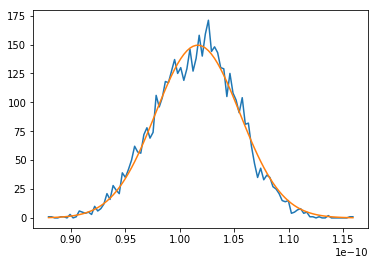

parameter: [1.44791525e-09 1.01650917e-10 3.86581864e-12] [A, mu, sigma]


In [25]:
# [A, mu, sigma]
gaussParamsHist = [1e-9, 1.01e-10, 1e-12]

HistFitParamsGauss = fitSingle(np.array([HistGauss[0], HistGauss[1]]), None, None, gaussParamsHist)

### result GAUSSFIT

In [26]:
DoubleJitter, SingleJitter, Mu = result(HistFitParamsGauss)

σ_0: 3.8658186399947727 ps
σ_1: 2.73354657517766 ps
σ_1 = σ_0 / sqrt(2)

μ: 101.65091716481993 ps

coma separated [σ_0, σ_1, μ]
3.8658186399947725e-12,2.7335465751776603e-12,1.0165091716481994e-10

 tab separated [σ_0, σ_1, μ]
3.8658186399947725e-12	2.7335465751776603e-12	1.0165091716481994e-10


## algorithm 2: min

In [27]:
C1["min"] = minChannel(C1)
C3["min"] = minChannel(C3)

## algorithm 3: threshold

In [28]:
factor = 0.5

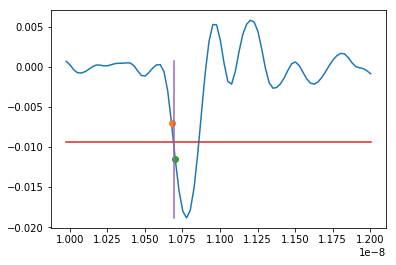

xt: 1.0690598565439913e-08 ps, yt -0.009421125023209242 ps


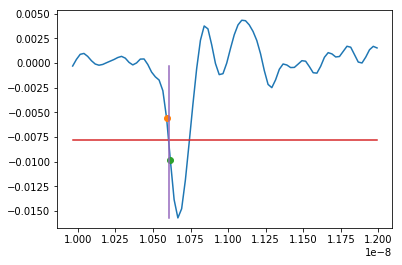

xt: 1.060388408251562e-08 ps, yt -0.007860037475552417 ps


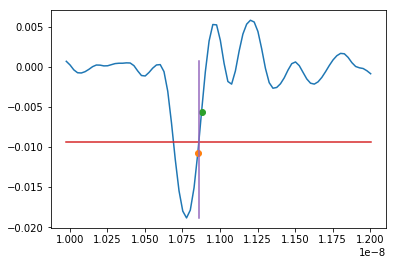

xt: 1.0858662324821134e-08 ps, yt -0.009421125023209242 ps


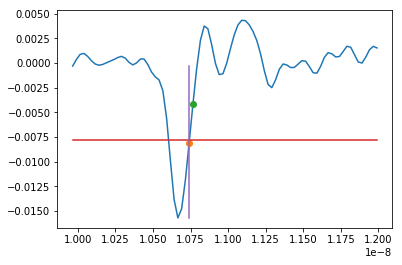

xt: 1.0742193716050743e-08 ps, yt -0.007860037475552417 ps


In [29]:
C1["thres5f"] = threshold(C1, factor, show=120)
C3["thres5f"] = threshold(C3, factor, show=120)
C1["thres5r"] = threshold(C1, factor, fallingEdge = False, show=120)
C3["thres5r"] = threshold(C3, factor, fallingEdge = False, show=120)

In [30]:
C1["thres5c"] = (C1["thres5r"] + C1["thres5f"]) / 2
C3["thres5c"] = (C3["thres5r"] + C3["thres5f"]) / 2

### histogram

In [31]:
JitterThres5f = jitter(C1, C3, storage = "thres5f", axis = 0)
JitterThres5c = jitter(C1, C3, storage = "thres5c", axis = 0)
JitterThres5r = jitter(C1, C3, storage = "thres5r", axis = 0)

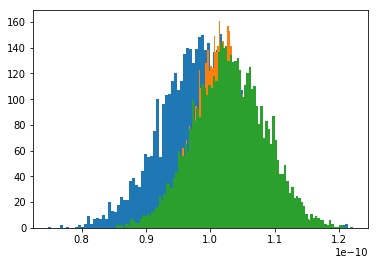

In [32]:
bins = 100

HistThres5f = histogram(JitterThres5f, bins)
HistThres5c = histogram(JitterThres5c, bins)
HistThres5r = histogram(JitterThres5r, bins)

### fit gauss to histogram

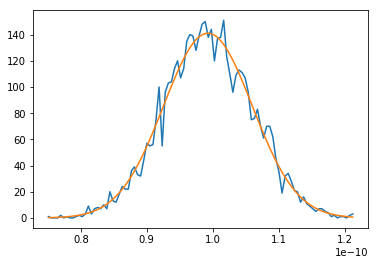

parameter: [2.37904437e-09 9.92604529e-11 6.72573304e-12] [A, mu, sigma]


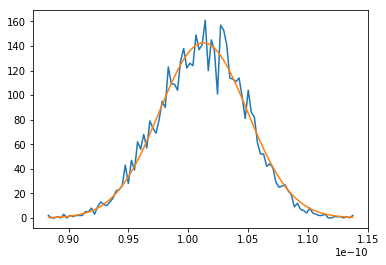

parameter: [1.31795587e-09 1.01265458e-10 3.68563986e-12] [A, mu, sigma]


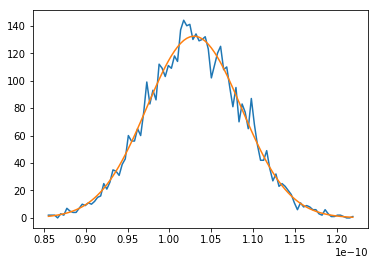

parameter: [1.87917326e-09 1.02950168e-10 5.66267730e-12] [A, mu, sigma]


In [33]:
# [A, mu, sigma]
gaussParamsThres5f = [1e-9, 1.00e-10, 1e-12]
gaussParamsThres5c = [1e-9, 1.00e-10, 1e-12]
gaussParamsThres5r = [1e-9, 1.00e-10, 1e-12]

HistFitParamsThres5f = fitSingle(np.array([HistThres5f[0], HistThres5f[1]]), None, None, gaussParamsThres5f)
HistFitParamsThres5c = fitSingle(np.array([HistThres5c[0], HistThres5c[1]]), None, None, gaussParamsThres5c)
HistFitParamsThres5r = fitSingle(np.array([HistThres5r[0], HistThres5r[1]]), None, None, gaussParamsThres5r)

### result

In [35]:
print("-- THRESHOLD 50% FALLING EDGE --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5f)

print("\n--------------------------\n\n-- THRESHOLD 50% CENTER --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5c)

print("\n-------------------------------\n\n-- THRESHOLD 50% RISING EDGE --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5r)

-- THRESHOLD 50% FALLING EDGE --
σ_0: 6.725733043637195 ps
σ_1: 4.755811443606298 ps
σ_1 = σ_0 / sqrt(2)

μ: 99.26045293498069 ps

coma separated [σ_0, σ_1, μ]
6.7257330436371955e-12,4.755811443606298e-12,9.92604529349807e-11

 tab separated [σ_0, σ_1, μ]
6.7257330436371955e-12	4.755811443606298e-12	9.92604529349807e-11

--------------------------

-- THRESHOLD 50% CENTER --
σ_0: 3.685639862069151 ps
σ_1: 2.606140939480548 ps
σ_1 = σ_0 / sqrt(2)

μ: 101.26545813033394 ps

coma separated [σ_0, σ_1, μ]
3.685639862069151e-12,2.606140939480548e-12,1.0126545813033394e-10

 tab separated [σ_0, σ_1, μ]
3.685639862069151e-12	2.606140939480548e-12	1.0126545813033394e-10

-------------------------------

-- THRESHOLD 50% RISING EDGE --
σ_0: 5.662677300618633 ps
σ_1: 4.0041175189385685 ps
σ_1 = σ_0 / sqrt(2)

μ: 102.95016768524901 ps

coma separated [σ_0, σ_1, μ]
5.6626773006186325e-12,4.0041175189385686e-12,1.0295016768524901e-10

 tab separated [σ_0, σ_1, μ]
5.6626773006186325e-12	4.00411751893